In [2]:
import tensorflow as tf

In [4]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 1s 0us/step


In [10]:
print(f"Data shape = {train_data.shape}")
print(f"Data sample = {train_data[0]}, size of this sample = {len(train_data[0])} words")
print(f"Label sample = {train_labels[0]}")
print(f"Max_review_length = {max([max(sequence) for sequence in train_data])}")

Data shape = (25000,)
Data sample = [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32], size of this sample = 2

In [13]:
# Get the actual review words from the integer indices.

word_dict = imdb.get_word_index()
reverse_word_index = dict((value, key) for (key, value) in word_dict.items())
def get_review_words(review_idx):
    return " ".join([reverse_word_index.get(i-3, "?") for i in train_data[review_idx]])

In [14]:
get_review_words(0)

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [15]:
# Vectorizing the data so a neural network can understand it. THat means converting
# everything to float32 values, and in this case, having a fixed input length for every 
# data sample. 

import numpy as np

def vectorize_data(sequences, vector_size=10000):
    vectorized = np.zeros((len(sequences), vector_size))
    for row_idx, sequence in enumerate(sequences):
        for word_idx in sequence:
            vectorized[row_idx, word_idx] = 1
    return vectorized

In [18]:
x_train = vectorize_data(train_data)
x_test = vectorize_data(test_data)
y_train = np.asarray(train_labels).astype(np.float32)
y_test = np.asarray(test_labels).astype(np.float32)

In [19]:
print(x_train[0])
print(y_train[0])

[0. 1. 1. ... 0. 0. 0.]
1.0


In [20]:
# Train - Validation split
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
# Building the model

from tensorflow import keras
from keras import layers

movie_review_model = keras.Sequential([
    layers.Dense(16, activation=keras.activations.relu),
    layers.Dense(16, activation=keras.activations.relu),
    layers.Dense(1, activation=keras.activations.sigmoid)
])

# movie_review_model.compile(optimizer=keras.optimizers.RMSprop,
#                             loss=keras.losses.binary_crossentropy,
#                             metrics=[keras.metrics.Accuracy])
movie_review_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
                        

In [26]:
history = movie_review_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2022-03-02 10:28:25.792185: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-02 10:28:26.462319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 4s 46ms/step - loss: 0.5191 - accuracy: 0.7811 - val_loss: 0.3943 - val_accuracy: 0.8650
Epoch 2/20


2022-03-02 10:28:29.566937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 20ms/step - loss: 0.3059 - accuracy: 0.9039 - val_loss: 0.3023 - val_accuracy: 0.8912
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2239 - accuracy: 0.9279 - val_loss: 0.2772 - val_accuracy: 0.8928
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1752 - accuracy: 0.9425 - val_loss: 0.2920 - val_accuracy: 0.8824
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1419 - accuracy: 0.9541 - val_loss: 0.2799 - val_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1189 - accuracy: 0.9605 - val_loss: 0.2902 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0974 - accuracy: 0.9711 - val_loss: 0.3272 - val_accuracy: 0.8776
Epoch 8/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0794 - accuracy: 0.9783 - val_loss: 0.3294 - val_accuracy: 0.8808
Epoch 9/20
30/30 [======

In [27]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

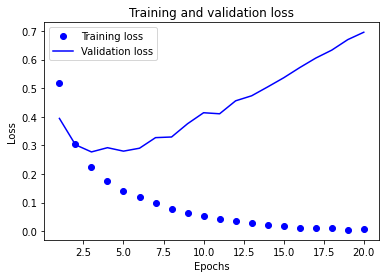

In [28]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

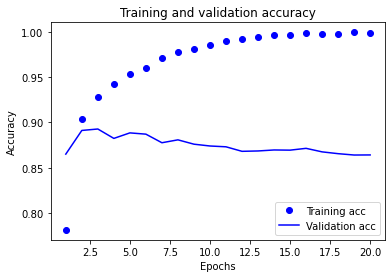

In [29]:
# plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [31]:
results = movie_review_model.evaluate(x_test, y_test)



782/782 [==============================] - 7s 8ms/step - loss: 0.7648 - accuracy: 0.8494


In [32]:
results

[0.764792263507843, 0.8493600487709045]